#Library Imports

In [1]:
import pandas as pd
import numpy as np
from numpy.ma.core import size
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

import warnings
warnings.filterwarnings("ignore")

# Dataset Imports - from Google drive

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
raw_data_path = r'/content/gdrive/MyDrive/Datasets/HR_Analytics_Kaggle.csv'

In [4]:
raw_data = pd.read_csv(raw_data_path)
raw_data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Exploratory Data Analysis

## Defining EDA function

In [5]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 150)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all').T)
    print("=" * 150)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 150)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 150)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 150)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 150)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 150)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 150)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 150)
    display(dataframe.head(3))

In [6]:
get_metadata(raw_data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,NaN,NaN,NaN,16875.358179,9616.292592,1.0,8554.25,16982.5,25169.75,33380.0
city,19158,123,city_103,4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,19158.0,NaN,NaN,NaN,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
gender,14650,3,Male,13221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,19158,2,Has relevent experience,13792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18772,3,no_enrollment,13817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18698,5,Graduate,11598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,16345,6,STEM,14492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,19093,22,>20,3286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,13220,8,50-99,3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe Shape
 (19158, 14)
Number of Duplicate Rows
 0
NULL Values Check
enrollee_id 0
city 0
city_development_index 0
gender 4508
relevent_experience 0
enrolled_university 386
education_level 460
major_discipline 2813
experience 65
company_size 5938
company_type 6140
last_new_job 423
training_hours 0
target 0
UNIQUE VALUES IN EVERY COLUMN
enrollee_id
[ 8949 29725 11561 ... 24576  5756 23834]
------------------------------------------------------------------------------------------------------------------------------------------------------
city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'ci

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


**Inference**:

*  19158 rows, 14 columns
*   2 Float Columns, 2 Integer Column, 10 Object Columns  
*   From the statistical summary, we can infer the following:
    * training_hours may have outliers
      *  min(0th percentile) - 1.0
      *  25th percentile - 23.0
      *  50th percentile - 47.0
      *  75th percentile - 88.0
      *  max(100th percentile) - 336.0[differs much from the 75th percentile]
    * gender - Males data is more (13221/14650 are Males)
*  gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job columns have NULL values
*  company_size column has an error value - '10/49'. This should be 10-49



# Exploratory Data Analysis

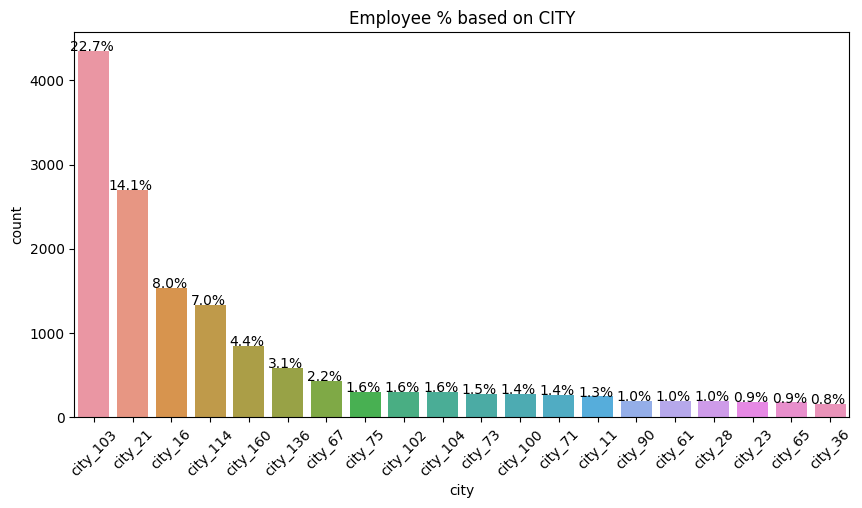

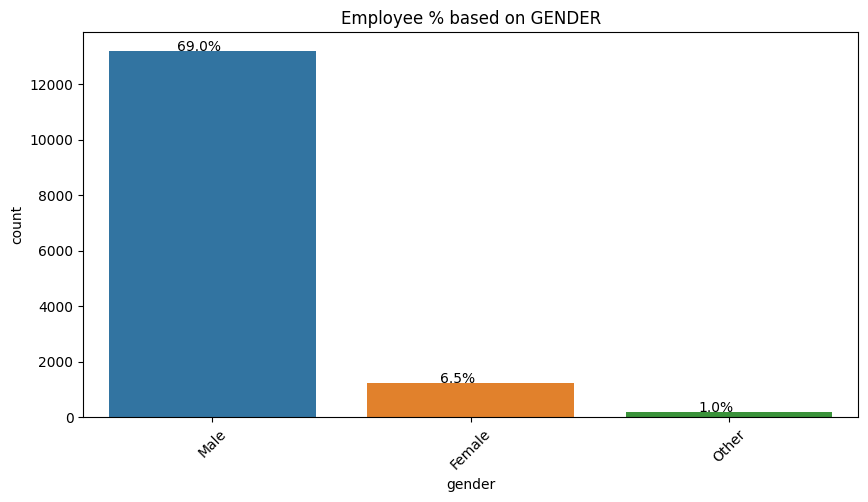

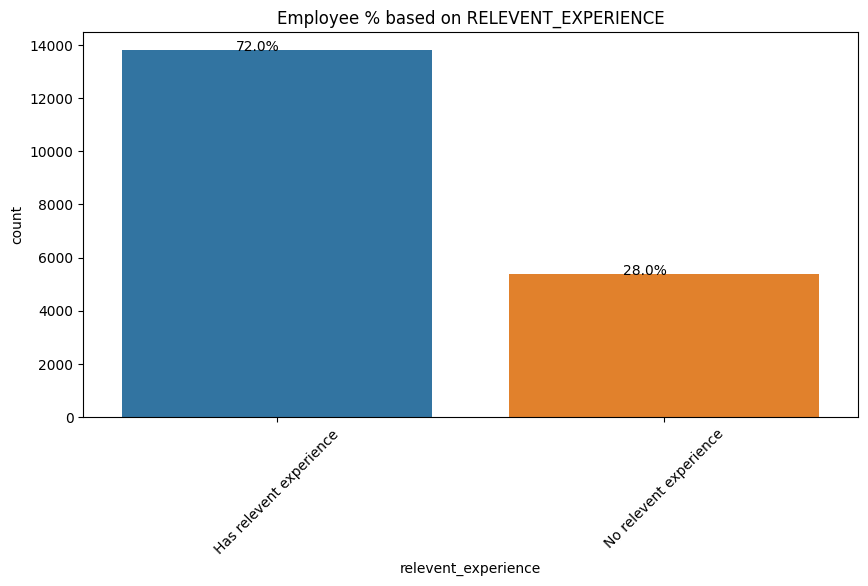

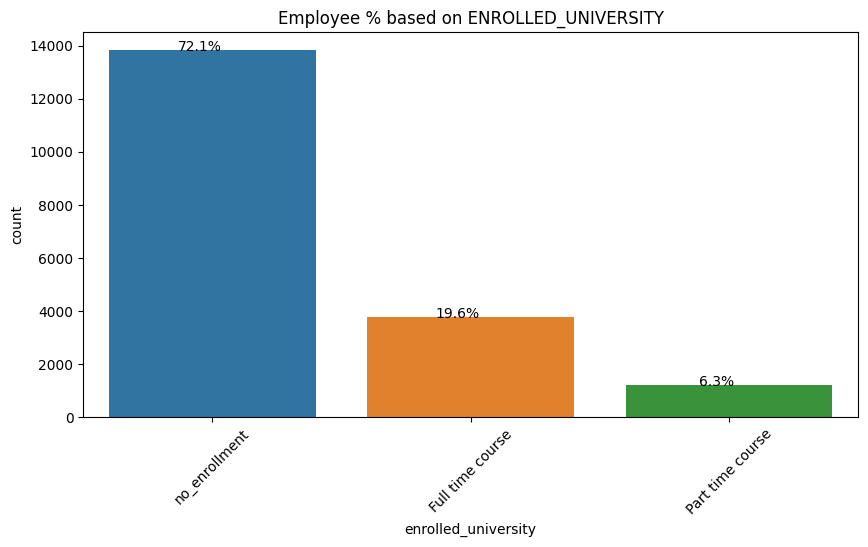

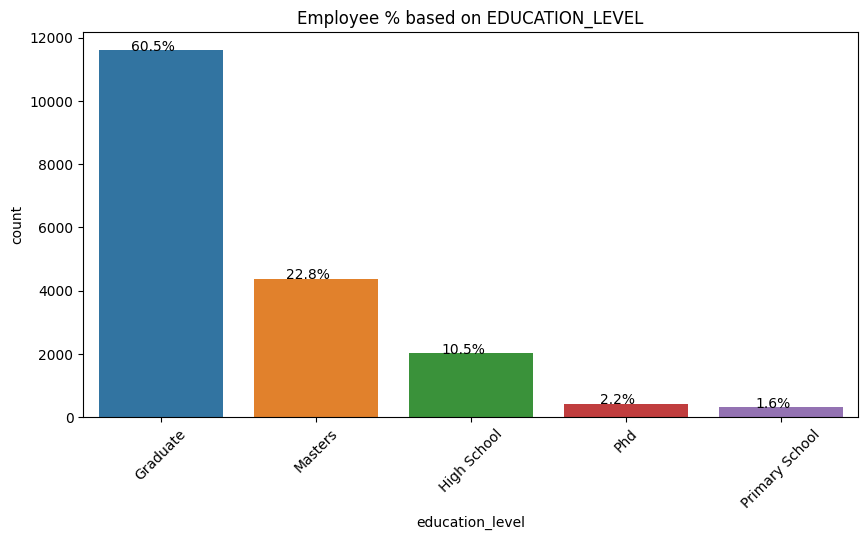

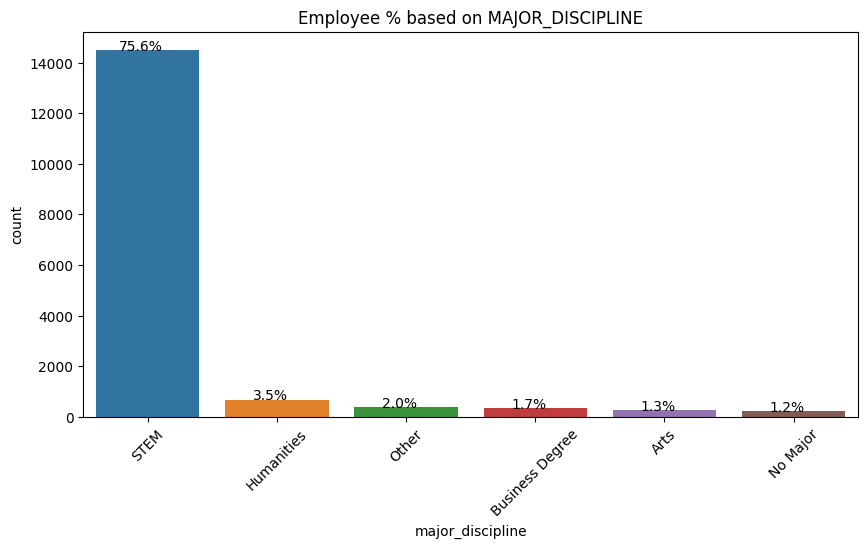

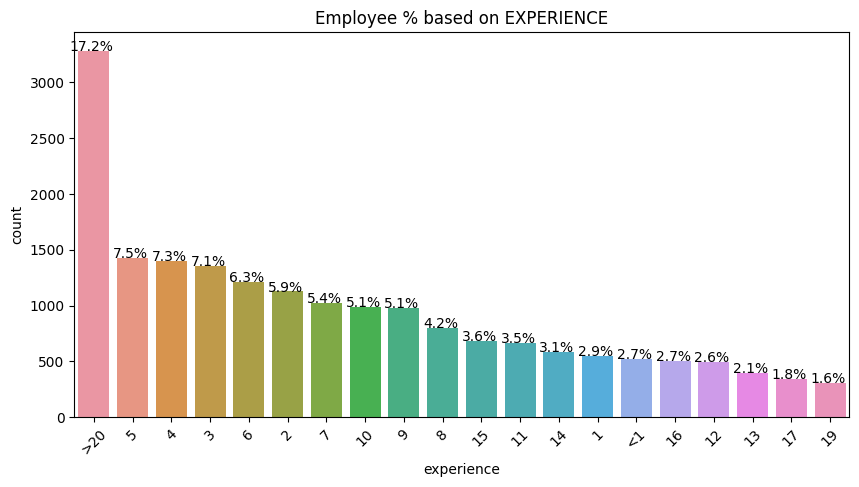

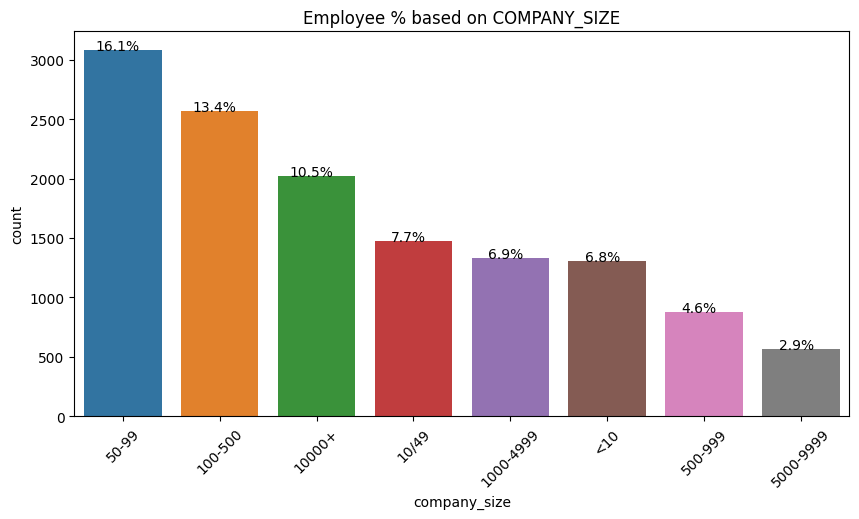

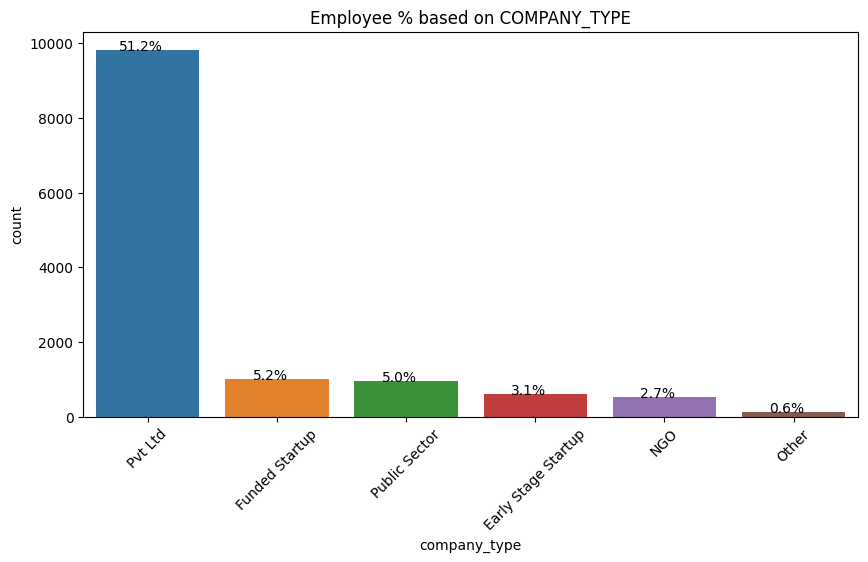

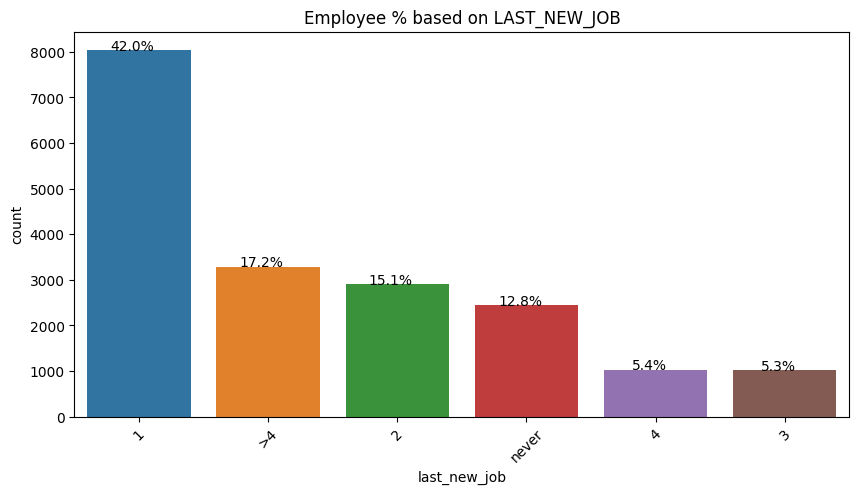

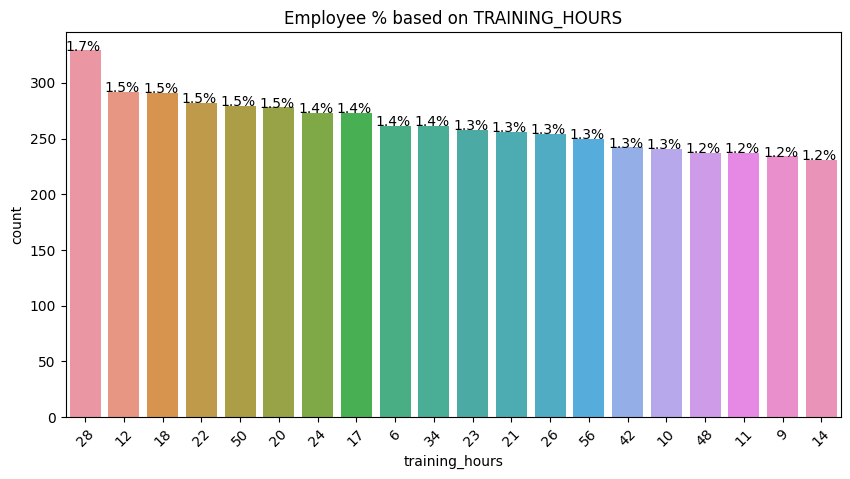

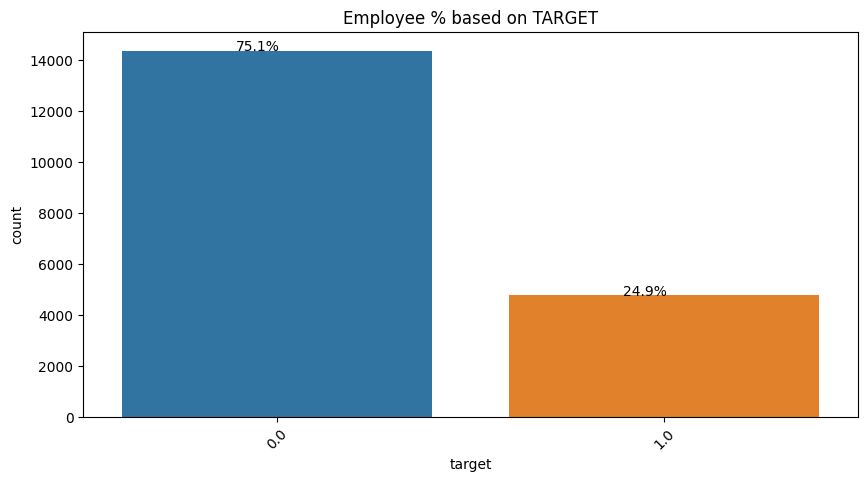

In [7]:
# columns = raw_data.columns
columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']
for col in columns:
  total = float(len(raw_data))
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(x=col, data=raw_data, order = raw_data[col].value_counts().iloc[:20].index, ax=ax)
  plt.title(f'Employee % based on {col.upper()}')
  plt.xticks(rotation=45)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width() / 2 - 0.05
      y = p.get_y() + p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()
  print("="*160)

*   Male Employees contribute about 69%
*   72% of the employees have the relevant experience
*   About 20% of the employees pursuing their higher education and enrolled in Universities for Full-Time course. These people might not be selected in Interviews
*  About 60% of the employees are Graduates and nearly 25%(approx.) hold Master Degrees
* About 75% of the employess are from Engineering, Science and Technology, and Mathematics domain
* About 18% of employees have >20 years of experience
* About 42% of the employees previously worked in one company only (Less number of switching companies)
* Since the target column values are in 3:1 ratio (75% : 25%), the dataset can be considered **IMBALANCED**
---
**NaN Counts:**
* company_type column - 32%
* company_size column - 31%
* major_discipline column - 15%  

***The columns with NaN values >30% can be dropped. Because imputing more null values leads to error***



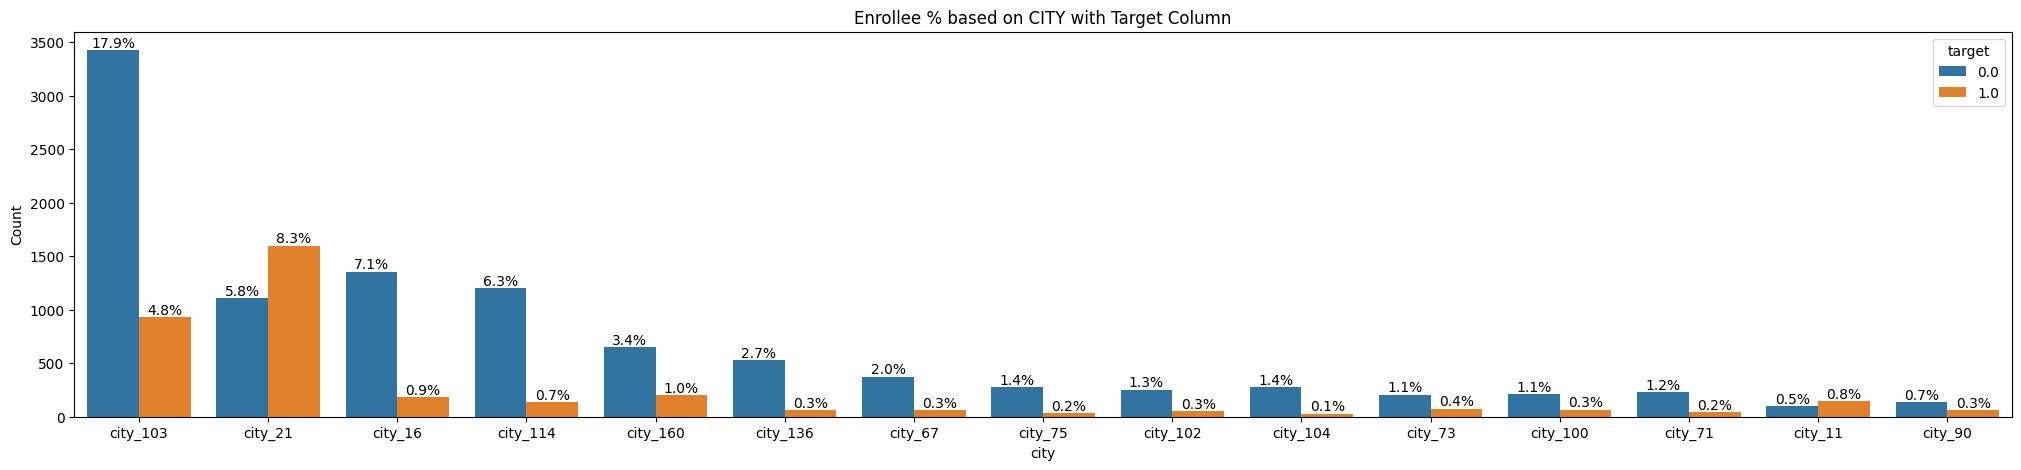

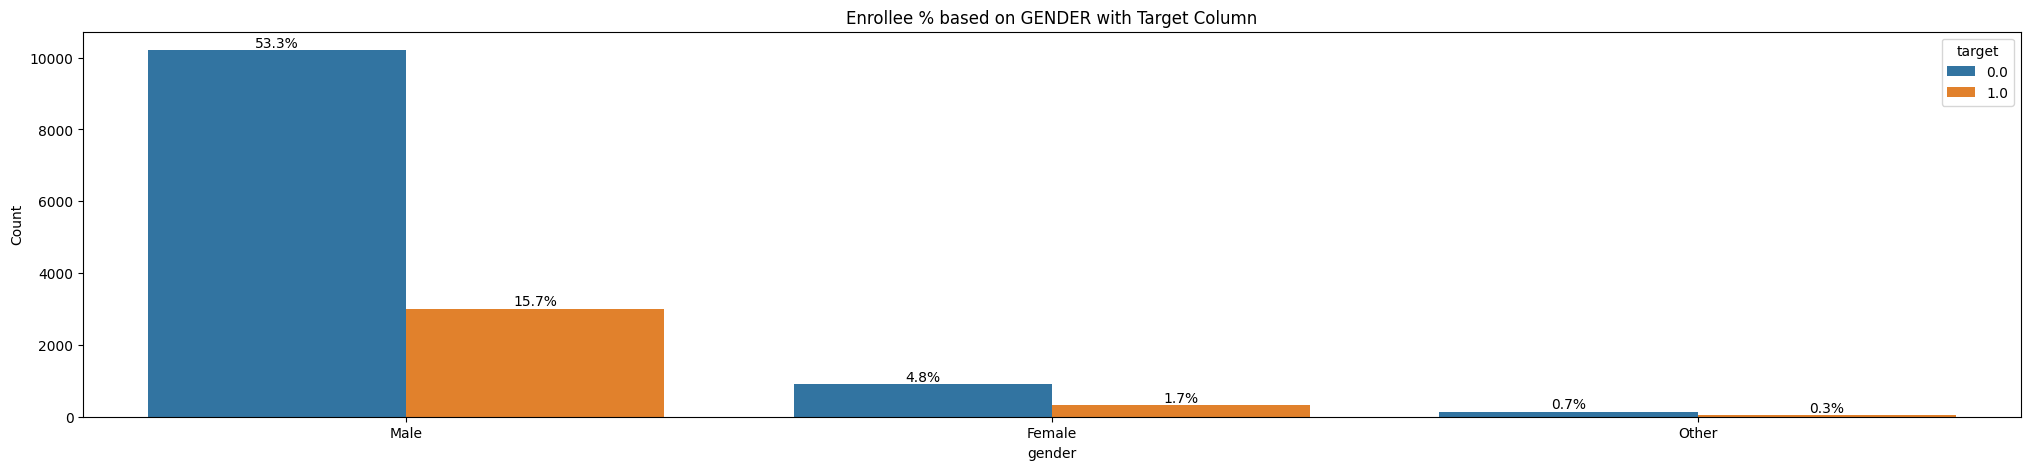

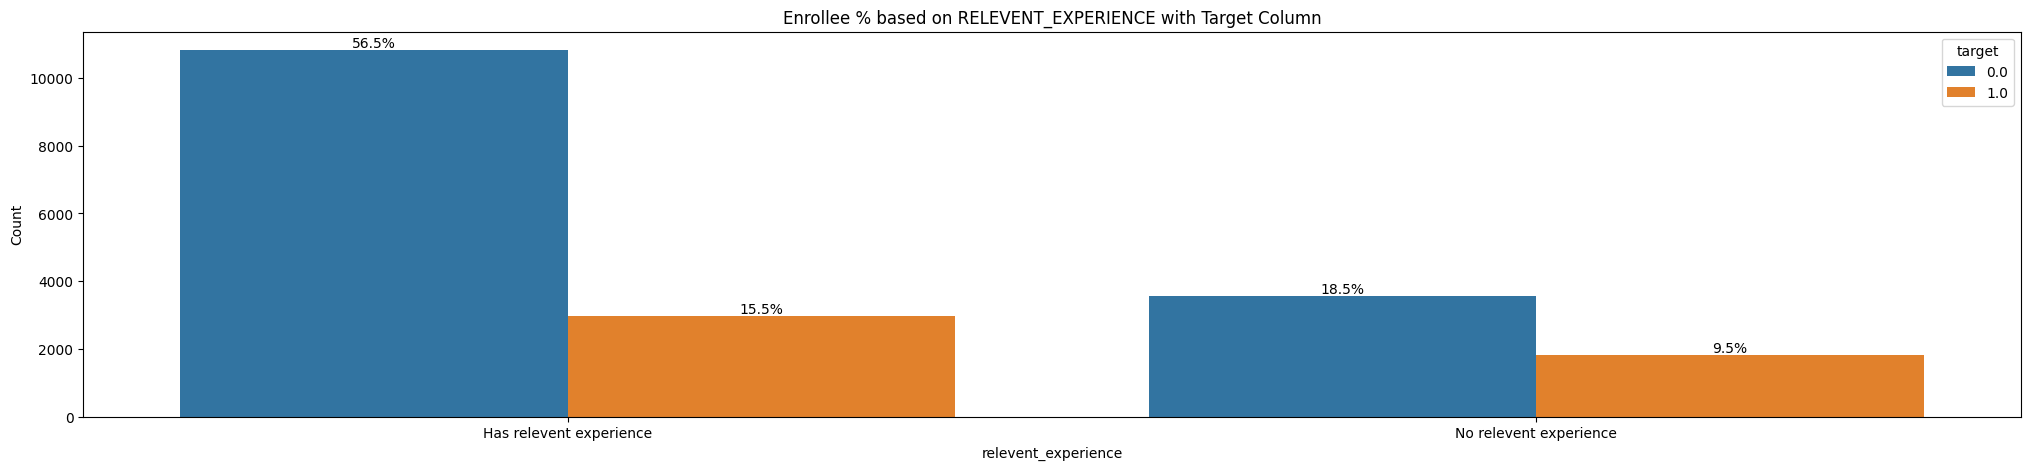

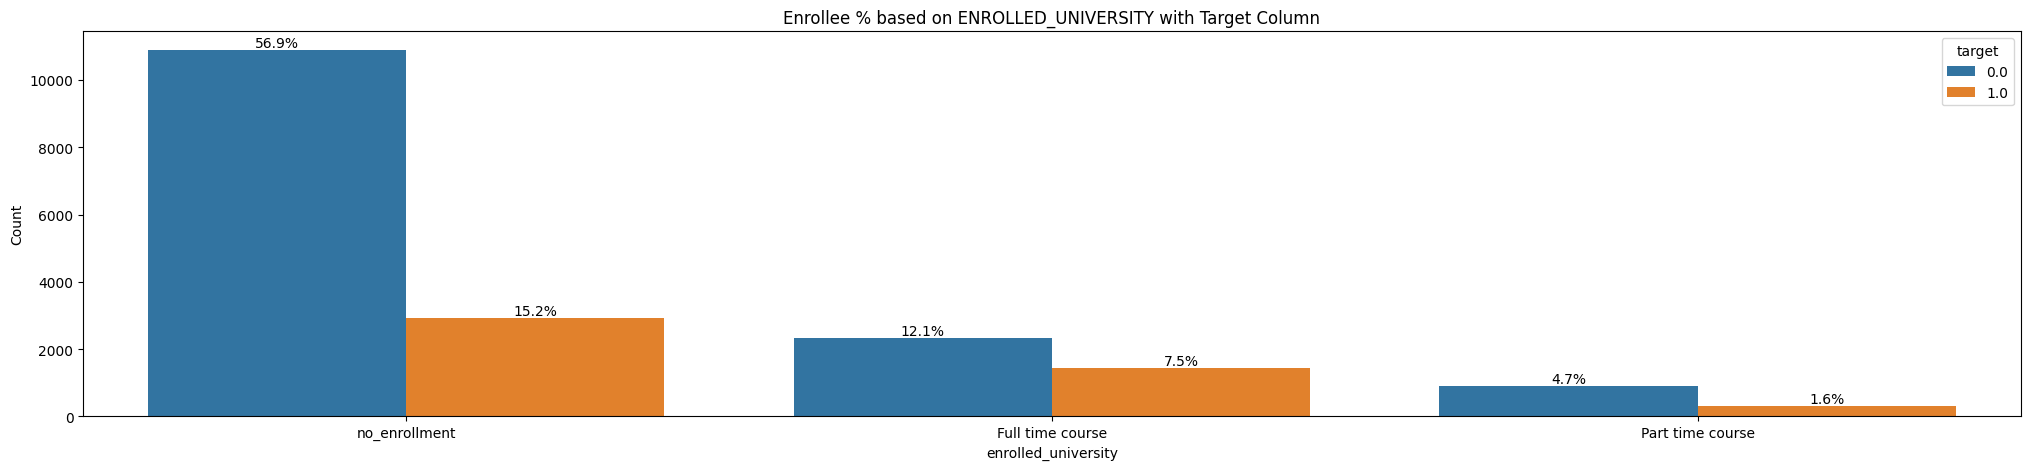

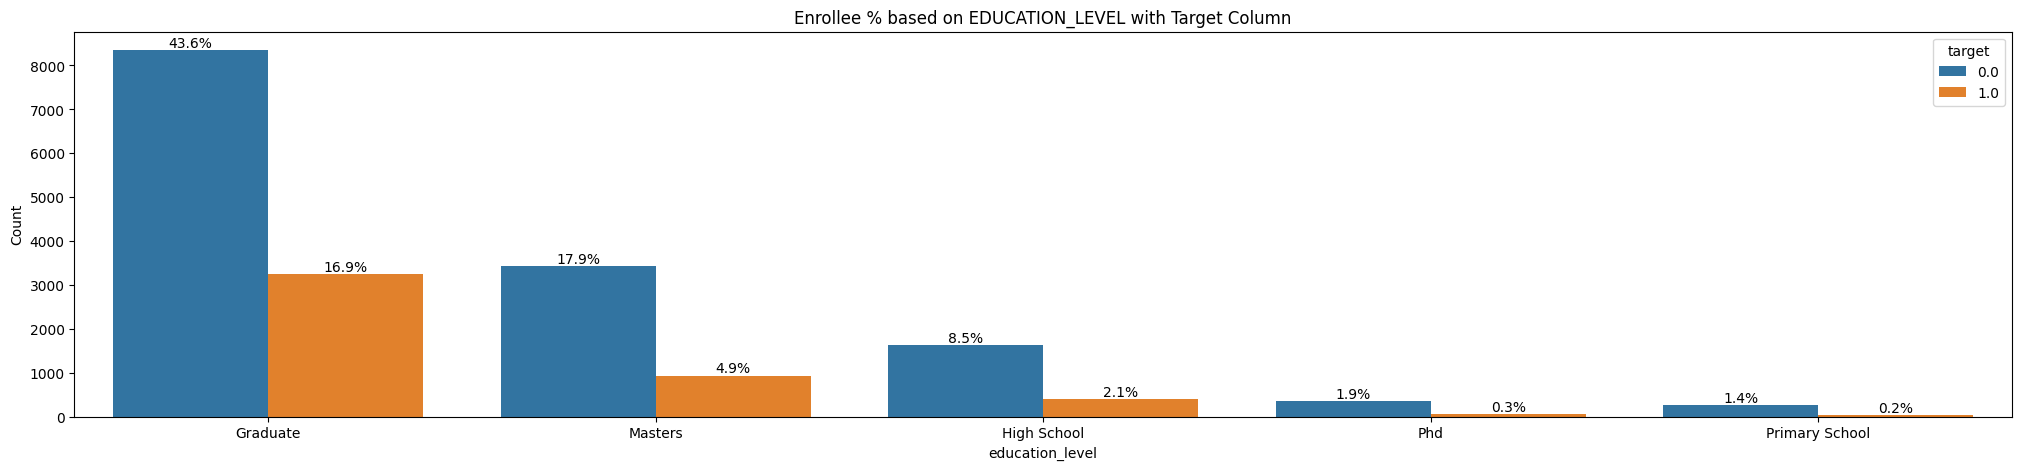

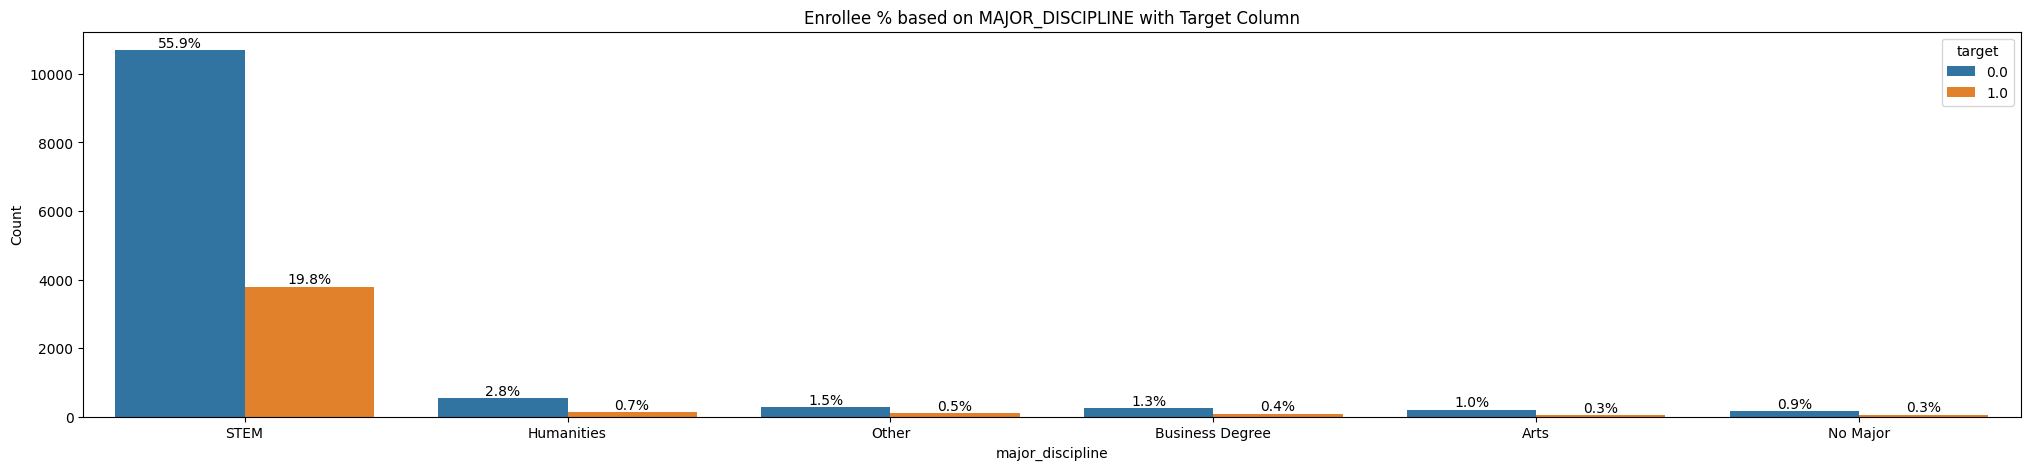

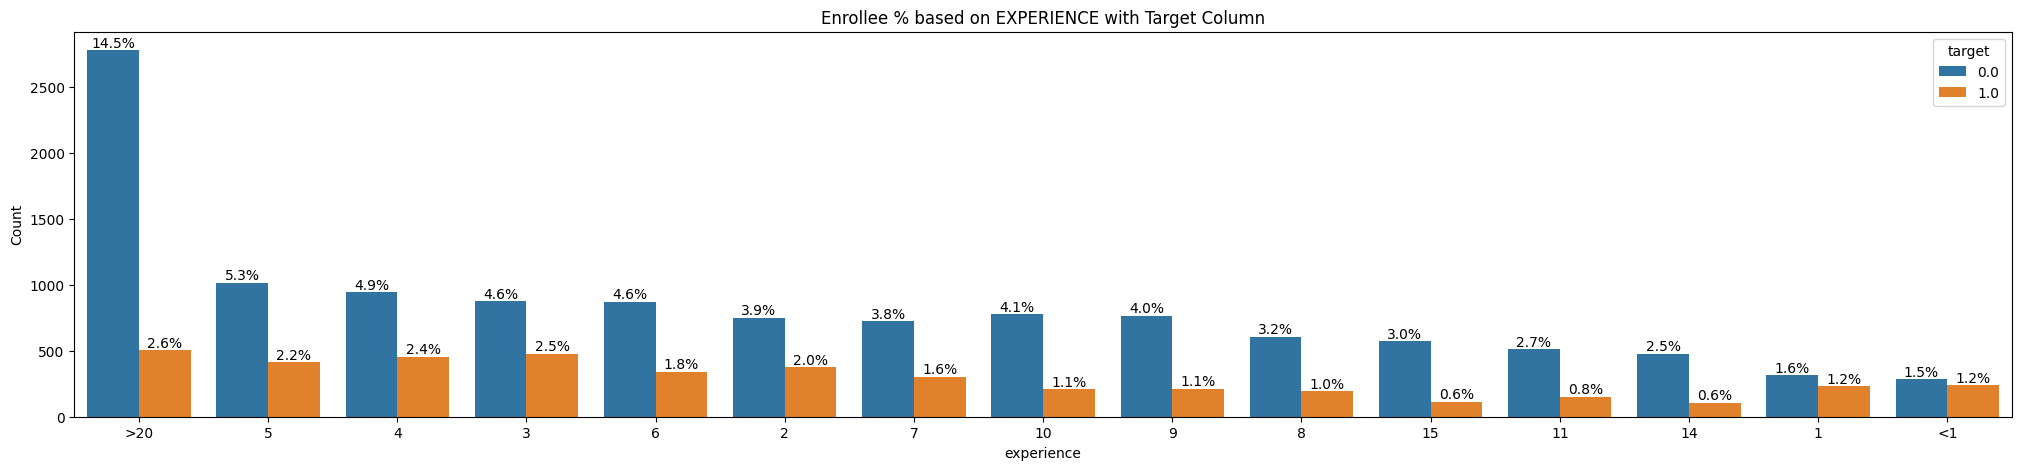

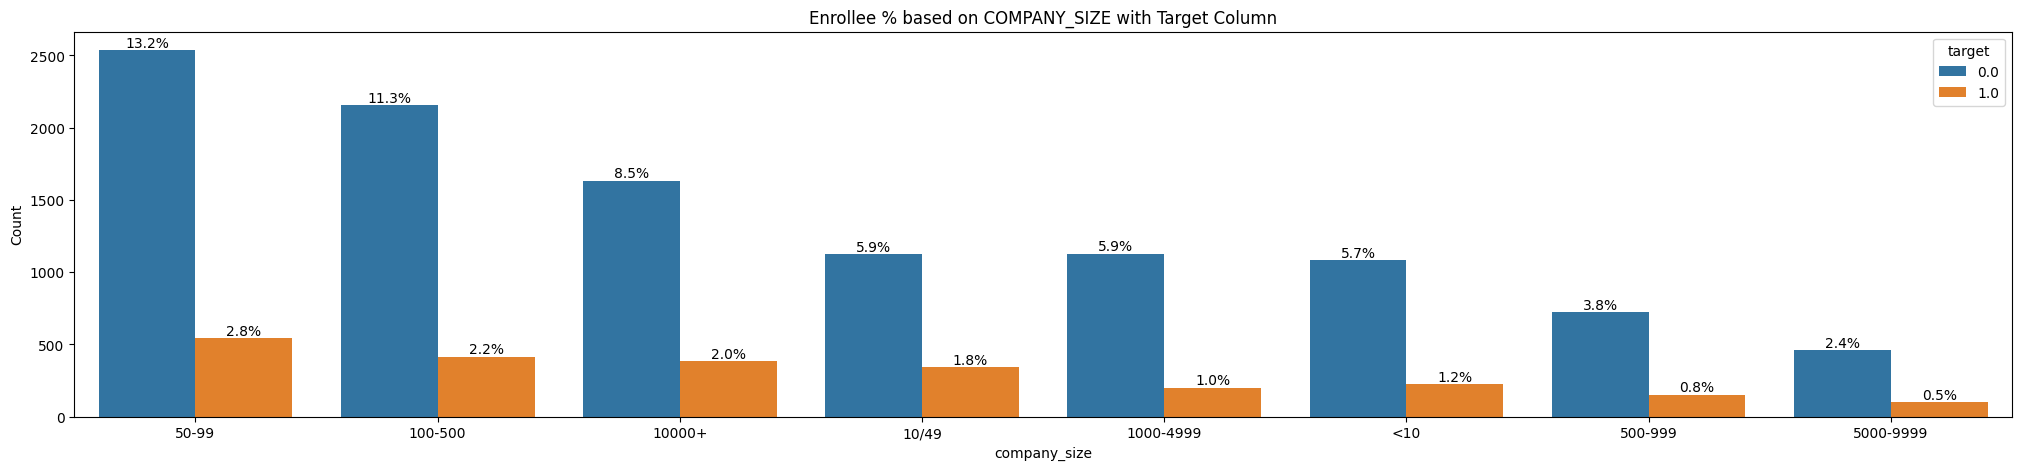

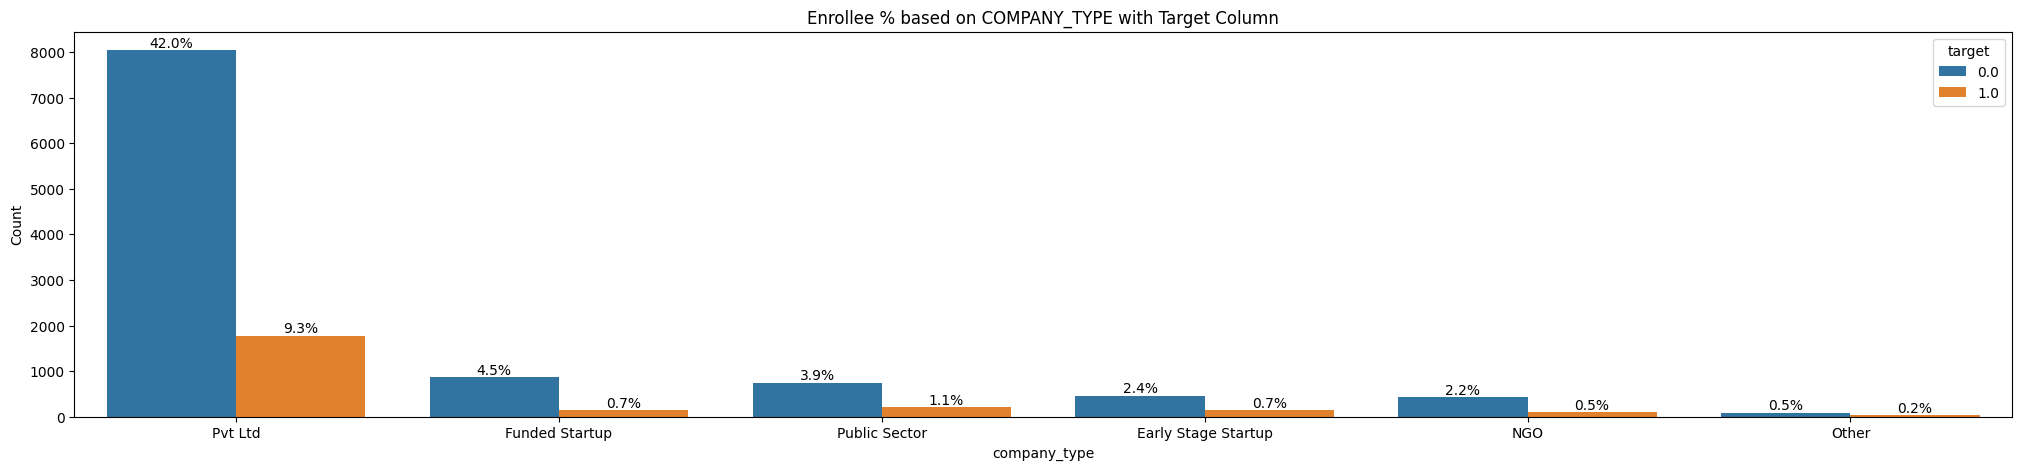

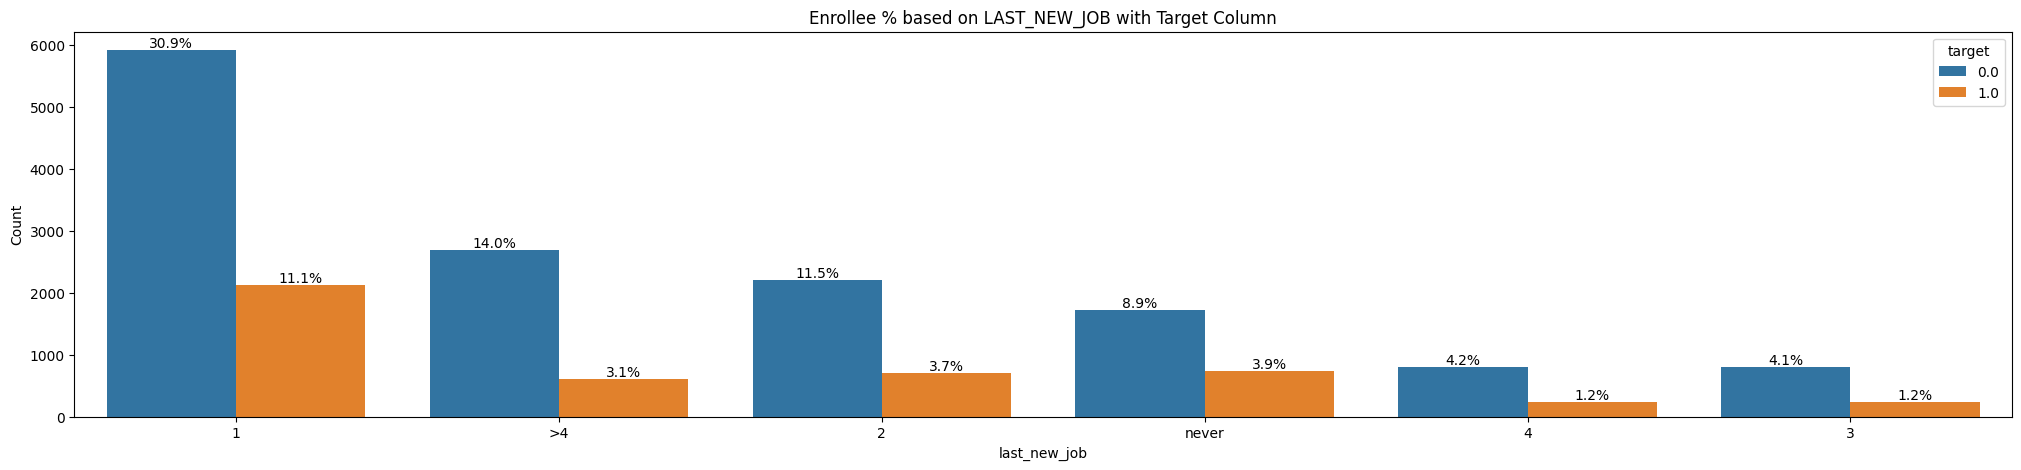

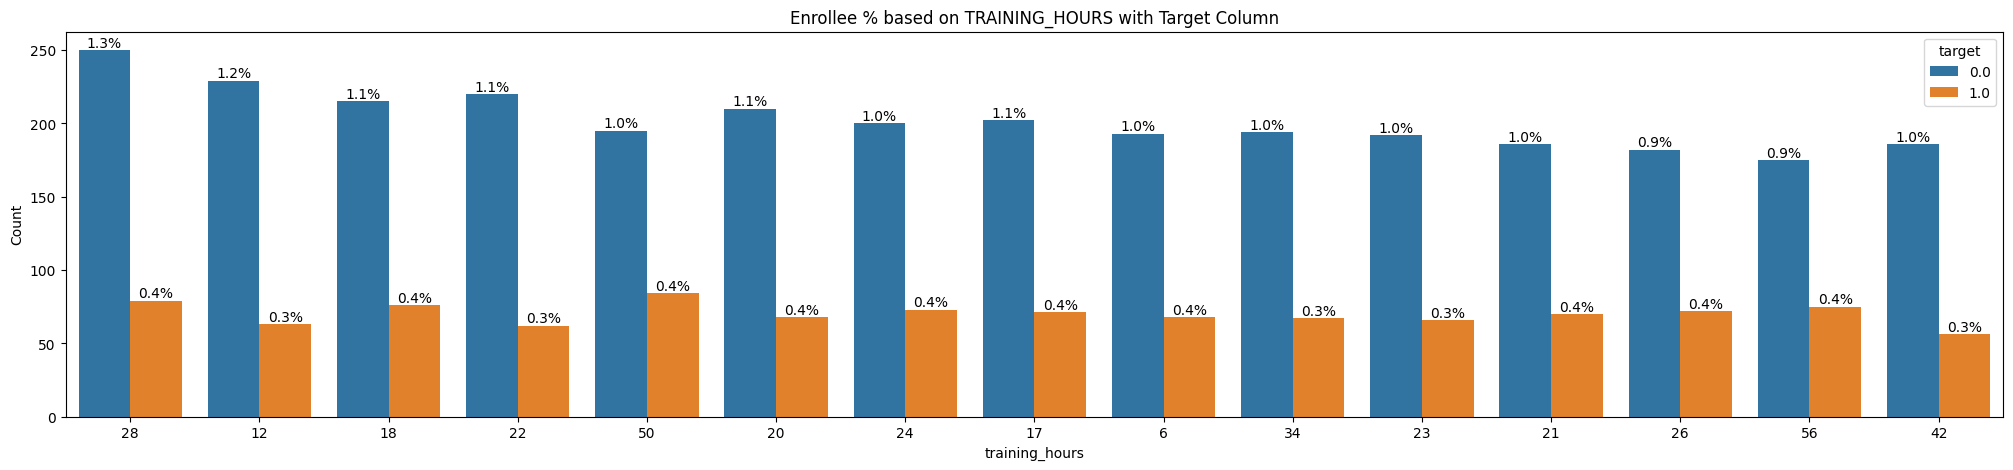

In [8]:
columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']

for col in columns:
  # print(col)
  fig, ax = plt.subplots(figsize=(25, 5))
  sns.countplot(x=col, hue="target", data=raw_data, order = raw_data[col].value_counts().iloc[:15].index, ax=ax)
  ax.set(ylabel='Count', title=f'Enrollee % based on {col.upper()} with Target Column')
  # add annotations
  for c in ax.containers:
      # custom label calculates percent and add an empty string so 0 value bars don't have a number
      labels = [f'{h/raw_data.target.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
      ax.bar_label(c, labels=labels, label_type='edge')
  plt.show()

***We cannot infer the most out of the target column, because the dataset is imbalanced***
* Eventhough the city_103 has maximum number of people enrolled, they get less chance of placing in the company  
* Though the enrollee has relevant experience, they are less likely to get placed (out of 72% of the people, only 15% are placed)


## Outlier Detection

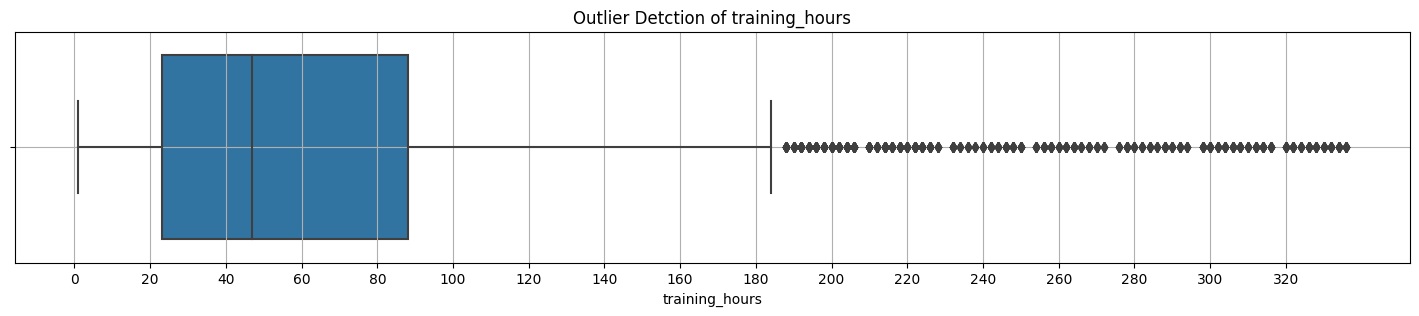

In [9]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of training_hours')
sns.boxplot(x = raw_data['training_hours'])
plt.grid()
plt.xticks(np.arange(0, 340, step=20))
plt.show()

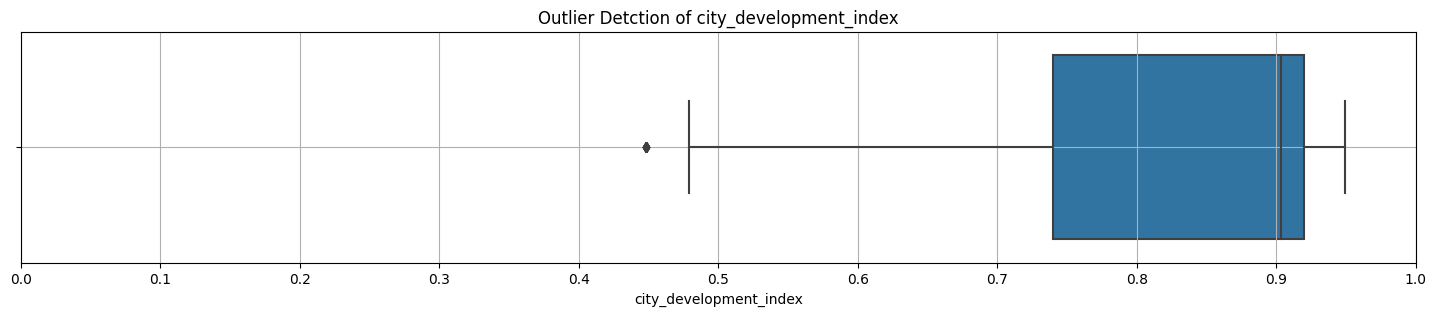

In [10]:
plt.figure(figsize=(18,3))
plt.title('Outlier Detction of city_development_index')
sns.boxplot(x = raw_data['city_development_index'])
plt.grid()
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

# Pre-processing

## Dropping Columns with NaN values greater than 30% - company_size and company_type

In [11]:
drop_cols = raw_data.drop(['company_size', 'company_type'], axis=1)
drop_cols.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0


## Dropping Rows with more than 2 NaN values

In [12]:
drop_rows = drop_cols.copy()
drop_rows['NaN_count'] = drop_rows.isnull().sum(axis=1)
drop_rows.sort_values(['NaN_count'], ascending=[False]).head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,NaN_count
17977,18594,city_134,0.698,NaN,Has relevent experience,NaN,NaN,NaN,>20,NaN,51,0.0,5
7746,20575,city_21,0.624,NaN,No relevent experience,NaN,NaN,NaN,5,NaN,98,0.0,5
9206,6202,city_103,0.920,NaN,No relevent experience,NaN,NaN,NaN,4,NaN,138,0.0,5
1376,30685,city_103,0.920,NaN,Has relevent experience,NaN,NaN,NaN,6,NaN,156,0.0,5
11789,18997,city_136,0.897,NaN,No relevent experience,NaN,NaN,NaN,4,NaN,22,0.0,5


In [13]:
drop_rows_ = drop_rows[drop_rows['NaN_count']<3]
drop_rows_.sort_values(['NaN_count'], ascending=[False]).head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,NaN_count
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,1,127,0.0,2
4415,25159,city_105,0.794,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,4,0.0,2
2355,5384,city_136,0.897,NaN,Has relevent experience,no_enrollment,Phd,STEM,16,NaN,5,0.0,2
12631,21347,city_21,0.624,NaN,Has relevent experience,NaN,Graduate,STEM,7,1,18,0.0,2
10084,1414,city_101,0.558,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,141,0.0,2


## Imputing NULL values

### Gender

In [14]:
drop_rows_[drop_rows_['gender'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,NaN_count
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0,1
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,never,52,1.0,2
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,1,24,1.0,1


Arranging the Enrollee ID and City in ascending order and applying Backfill in Gender column (Assuming like-genders, apply for job sequentially) - But the enrollees gender from entire city is missing.

```
# imp_gend = drop_cols.sort_values(['enrollee_id','city'], ascending=[True,True]).copy()
# imp_gend['gender'] = drop_cols.groupby('city')['gender'].fillna(method='bfill')
# imp_gend.filter(items=[2,3,5], axis=0)
```



In [15]:
imp_gend = drop_rows_.drop('NaN_count', axis=1).copy()
imp_gend['gender'] = drop_cols['gender'].fillna(value=drop_cols['gender'].mode()[0])
imp_gend.filter(items=[2,3,5], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,<1,never,52,1.0
5,21651,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,1,24,1.0


In [16]:
imp_gend[imp_gend['gender'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target


### Enrolled University

In [17]:
imp_gend['enrolled_university'].value_counts()

no_enrollment       13676
Full time course     3684
Part time course     1183
Name: enrolled_university, dtype: int64

In [18]:
imp_gend[imp_gend['enrolled_university'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,<1,never,52,1.0
62,24690,city_41,0.827,Male,Has relevent experience,NaN,Masters,STEM,13,1,15,0.0
224,25114,city_102,0.804,Male,No relevent experience,NaN,Masters,STEM,6,1,17,0.0


In [19]:
imp_univ = imp_gend.sort_values(['enrollee_id','city'], ascending=[True,True]).copy()
imp_univ['enrolled_university'] = imp_univ.groupby(['city','relevent_experience'])['enrolled_university'].apply(lambda x: x.fillna(x.mode().iloc[0]))
imp_univ.filter(items=[3,62,224], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
3,33241,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,never,52,1.0
62,24690,city_41,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,13,1,15,0.0
224,25114,city_102,0.804,Male,No relevent experience,no_enrollment,Masters,STEM,6,1,17,0.0


In [20]:
imp_univ[imp_univ['enrolled_university'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target


### Education Level

In [21]:
imp_univ[imp_univ['education_level'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
7879,36,city_10,0.895,Male,No relevent experience,no_enrollment,NaN,NaN,3,2,4,0.0
10032,114,city_16,0.910,Male,Has relevent experience,no_enrollment,NaN,NaN,>20,1,82,0.0
7956,420,city_103,0.920,Male,No relevent experience,no_enrollment,NaN,NaN,7,never,108,0.0


In [22]:
imp_edu_lvl = imp_univ.copy()
imp_edu_lvl['education_level'] = imp_edu_lvl.groupby(['relevent_experience'])['education_level'].apply(lambda x: x.fillna(x.mode().iloc[0]))
imp_edu_lvl.filter(items=[7879,10032,7956], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
7879,36,city_10,0.895,Male,No relevent experience,no_enrollment,Graduate,NaN,3,2,4,0.0
10032,114,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,NaN,>20,1,82,0.0
7956,420,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,NaN,7,never,108,0.0


In [23]:
imp_edu_lvl[imp_edu_lvl['education_level'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target


### Major Discipline

In [24]:
imp_edu_lvl[imp_edu_lvl['major_discipline'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,never,150,0.0
4069,11,city_103,0.920,Male,Has relevent experience,Part time course,Primary School,NaN,11,4,20,0.0
7879,36,city_10,0.895,Male,No relevent experience,no_enrollment,Graduate,NaN,3,2,4,0.0


In [25]:
imp_major = imp_edu_lvl.copy()
imp_major['major_discipline'] = imp_major['major_discipline'].fillna(value=imp_major['major_discipline'].mode()[0])
imp_major.filter(items=[17321,4069,7879], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,STEM,2,never,150,0.0
4069,11,city_103,0.920,Male,Has relevent experience,Part time course,Primary School,STEM,11,4,20,0.0
7879,36,city_10,0.895,Male,No relevent experience,no_enrollment,Graduate,STEM,3,2,4,0.0


In [26]:
imp_major[imp_major['major_discipline'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target


### Experience

In [27]:
imp_major[imp_major['experience'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
12779,2700,city_145,0.555,Male,No relevent experience,Full time course,Graduate,STEM,NaN,4,83,1.0
7636,2778,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,NaN,1,214,1.0
7532,3113,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,1,94,0.0


In [28]:
imp_exp1 = imp_major.copy()
imp_exp1['experience'] = imp_exp1.groupby(['last_new_job', 'enrolled_university'])['experience'].apply(lambda x: x.fillna(x.mode().iloc[0]))
imp_exp1.filter(items=[12779,7636,7532], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
12779,2700,city_145,0.555,Male,No relevent experience,Full time course,Graduate,STEM,4,4,83,1.0
7636,2778,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,4,1,214,1.0
7532,3113,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,94,0.0


In [29]:
imp_exp1[imp_exp1['experience'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
5252,169,city_98,0.949,Male,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,62,0.0
7483,225,city_173,0.878,Male,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,19,0.0
5280,436,city_11,0.550,Male,No relevent experience,Part time course,Graduate,STEM,NaN,NaN,4,0.0


In [30]:
imp_exp2 = imp_exp1.copy()
imp_exp2['experience'] = imp_exp2.groupby(['training_hours', 'enrolled_university'])['experience'].apply(lambda x: x.fillna(x.mode().iloc[0]))
imp_exp2.filter(items=[5252,7483,5280], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
5252,169,city_98,0.949,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,62,0.0
7483,225,city_173,0.878,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,19,0.0
5280,436,city_11,0.550,Male,No relevent experience,Part time course,Graduate,STEM,19,NaN,4,0.0


In [31]:
imp_exp2[imp_exp2['experience'].isna()].head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target


### Last New Job

In [32]:
imp_exp2[imp_exp2['last_new_job'].isna()].tail(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
11677,32687,city_42,0.563,Male,Has relevent experience,Full time course,Phd,STEM,4,NaN,43,1.0
7940,32721,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,11,0.0
3805,32798,city_79,0.698,Male,Has relevent experience,Full time course,Masters,STEM,1,NaN,95,0.0


In [33]:
imp_lastjob = imp_exp2.copy()
imp_lastjob['last_new_job'] = imp_lastjob.groupby(['experience', 'enrolled_university'])['last_new_job'].apply(lambda x: x.fillna(x.mode().iloc[0]))
imp_lastjob.filter(items=[11677,7940,3805], axis=0)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
11677,32687,city_42,0.563,Male,Has relevent experience,Full time course,Phd,STEM,4,1,43,1.0
7940,32721,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,>4,11,0.0
3805,32798,city_79,0.698,Male,Has relevent experience,Full time course,Masters,STEM,1,1,95,0.0


# Final Data

In [34]:
data = imp_lastjob.copy()
get_metadata(data)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18795 entries, 17321 to 1663
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18795 non-null  int64  
 1   city                    18795 non-null  object 
 2   city_development_index  18795 non-null  float64
 3   gender                  18795 non-null  object 
 4   relevent_experience     18795 non-null  object 
 5   enrolled_university     18795 non-null  object 
 6   education_level         18795 non-null  object 
 7   major_discipline        18795 non-null  object 
 8   experience              18795 non-null  object 
 9   last_new_job            18795 non-null  object 
 10  training_hours          18795 non-null  int64  
 11  target                  18795 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.4+ MB
None
STATISTICAL INFORMATION



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
enrollee_id,18795.0,NaN,NaN,NaN,16890.766214,9636.730749,1.0,8542.5,17005.0,25234.5,33380.0
city,18795,123,city_103,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_development_index,18795.0,NaN,NaN,NaN,0.829727,0.122829,0.448,0.743,0.91,0.92,0.949
gender,18795,3,Male,17372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relevent_experience,18795,2,Has relevent experience,13658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolled_university,18795,3,no_enrollment,13874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,18795,5,Graduate,11786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_discipline,18795,6,STEM,16943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience,18795,22,>20,3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_new_job,18795,6,1,8130,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataframe Shape
 (18795, 12)
Number of Duplicate Rows
 0
NULL Values Check
enrollee_id 0
city 0
city_development_index 0
gender 0
relevent_experience 0
enrolled_university 0
education_level 0
major_discipline 0
experience 0
last_new_job 0
training_hours 0
target 0
UNIQUE VALUES IN EVERY COLUMN
enrollee_id
[    1     2     4 ... 33377 33379 33380]
------------------------------------------------------------------------------------------------------------------------------------------------------
city
['city_103' 'city_67' 'city_136' 'city_16' 'city_114' 'city_21' 'city_23'
 'city_73' 'city_104' 'city_10' 'city_100' 'city_46' 'city_105' 'city_97'
 'city_74' 'city_61' 'city_57' 'city_160' 'city_65' 'city_45' 'city_72'
 'city_41' 'city_44' 'city_40' 'city_131' 'city_98' 'city_115' 'city_118'
 'city_71' 'city_20' 'city_159' 'city_173' 'city_64' 'city_28' 'city_102'
 'city_84' 'city_101' 'city_11' 'city_27' 'city_36' 'city_50' 'city_13'
 'city_144' 'city_91' 'city_145' 'city_165' 'city_134' 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
17321,1,city_103,0.92,Male,No relevent experience,no_enrollment,High School,STEM,2,never,150,0.0
6730,2,city_103,0.92,Male,No relevent experience,no_enrollment,Phd,STEM,15,3,128,1.0
10024,4,city_103,0.92,Male,No relevent experience,no_enrollment,Masters,STEM,9,>4,13,0.0
